<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/youtube%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import numpy as np

In [229]:
df=pd.read_csv('/content/newlstm.csv')
df

,date,spi1,l1,min,avg R.HUM
0,01-11-1979,2.145778,1.273802,18.778821,0.660878
1,01-12-1979,0.889794,2.145778,18.691581,0.672347
2,01-01-1980,-1.714817,0.889794,20.863300,0.632411
3,01-02-1980,-1.469306,-1.714817,21.647677,0.680302
4,01-03-1980,-1.469306,-1.469306,21.972833,0.749740
...,...,...,...,...,...
410,01-01-2014,0.317544,0.143235,21.317833,0.783198
411,01-02-2014,0.546507,0.317544,21.131000,0.946414
412,01-03-2014,0.629004,0.546507,19.451300,0.959161
413,01-04-2014,0.174373,0.629004,19.720710,0.892296


In [230]:
print(df.dtypes)

date          object
spi1         float64
l1           float64
min          float64
avg R.HUM    float64
dtype: object


In [ ]:
df['Date Time'] = pd.to_datetime(df['date'], dayfirst=True)
df['Day'] = df['Date Time'].dt.day
df['Month'] = df['Date Time'].dt.month
df['Year'] = df['Date Time'].dt.year

df

In [232]:
print(df.dtypes)

date                 object
spi1                float64
l1                  float64
min                 float64
avg R.HUM           float64
Date Time    datetime64[ns]
Day                   int64
Month                 int64
Year                  int64
dtype: object


In [ ]:
df.drop(['date'], axis=1, inplace=True)
df.drop(['Date Time'], axis=1, inplace=True)
df

In [234]:
X0=[]
X1=[]
X2=[]
X3=[]
X4=[]
X5=[]
X6=[]
y=[]

In [235]:
for i in range (0, df.shape[0]-100):
    X0.append(df.iloc[i:i + 100, 6])
    X1.append(df.iloc[i:i + 100, 5])
    X2.append(df.iloc[i:i + 100, 4])
    X3.append(df.iloc[i:i + 100, 3])
    X4.append(df.iloc[i:i + 100, 2])
    X5.append(df.iloc[i:i + 100, 1])
    X6.append(df.iloc[i:i + 100, 0])
    y.append(df.iloc[i + 100, 0])

In [ ]:
y

In [ ]:
X5

In [238]:
df.head(50)

,spi1,l1,min,avg R.HUM,Day,Month,Year
0,2.145778,1.273802,18.778821,0.660878,1,11,1979
1,0.889794,2.145778,18.691581,0.672347,1,12,1979
2,-1.714817,0.889794,20.863300,0.632411,1,1,1980
3,-1.469306,-1.714817,21.647677,0.680302,1,2,1980
4,-1.469306,-1.469306,21.972833,0.749740,1,3,1980
5,-1.469306,-1.469306,20.775290,0.856281,1,4,1980
6,-1.469306,-1.469306,19.893516,0.942733,1,5,1980
7,0.364798,-1.469306,20.174833,0.903878,1,6,1980
8,0.606144,0.364798,19.638161,0.882303,1,7,1980
9,0.606144,0.606144,19.940933,0.833859,1,8,1980


In [239]:
X0, X1, X2, X3, X4, X5, X6, y = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(X5), np.array(X6),np.array(y)

In [240]:
y.shape

(315,)

In [241]:
y=np.reshape(y, (len(y),1))
y.shape

(315, 1)

In [ ]:
y

In [244]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
X5 = scaler.fit_transform(X5)
X6 = scaler.fit_transform(X6)
y = scaler.fit_transform(y)

In [ ]:
X5


In [246]:
X5.shape


(315, 100)

In [247]:
X = np.stack([X0, X1, X2, X3, X4, X5, X6], axis=2)

In [248]:
X.shape

(315, 100, 7)

In [249]:
X_train, X_test = X[:-300], X[-115:]
y_train, y_test = y[:-300], y[-115:]

In [ ]:
 X[:-250]

In [251]:
X_train.shape[1], X_train.shape[2]

(100, 7)

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

In [253]:
model = Sequential()
# set return requesnce = true, if we are going to have another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

In [255]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = 'models/{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]

In [256]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [257]:
model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=callbacks, batch_size=16)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.2953 - mae: 0.5167 - val_loss: 0.2111 - val_mae: 0.4438
Epoch 2/50
1/1 [==============================] - 0s 132ms/step - loss: 0.2419 - mae: 0.4619 - val_loss: 0.1596 - val_mae: 0.3809
Epoch 3/50
1/1 [==============================] - 0s 129ms/step - loss: 0.1872 - mae: 0.3982 - val_loss: 0.1198 - val_mae: 0.3242
Epoch 4/50
1/1 [==============================] - 0s 118ms/step - loss: 0.1455 - mae: 0.3451 - val_loss: 0.0913 - val_mae: 0.2766
Epoch 5/50
1/1 [==============================] - 0s 115ms/step - loss: 0.1153 - mae: 0.3054 - val_loss: 0.0705 - val_mae: 0.2360
Epoch 6/50
1/1 [==============================] - 0s 117ms/step - loss: 0.0936 - mae: 0.2785 - val_loss: 0.0551 - val_mae: 0.2007
Epoch 7/50
1/1 [==============================] - 0s 130ms/step - loss: 0.0772 - mae: 0.2555 - val_loss: 0.0436 - val_mae: 0.1711
Epoch 8/50
1/1 [==============================] - 0s 123ms/step - loss: 0.0649 - mae: 0.2353 

In [258]:
MSE, MAE = model.evaluate(X_test, y_test)
print(MSE, MAE)

4/4 [==============================] - 0s 22ms/step - loss: 0.0493 - mae: 0.1746
0.049292128533124924 0.17455872893333435


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 Minutes)', fontsize=14)
plt.ylabel('Electricity Price (AUD)', fontsize=18)
plt.plot(predictions)
plt.plot(scaler.inverse_transform(y_test))
plt.legend(['Forecast', 'Actual'])
plt.show()

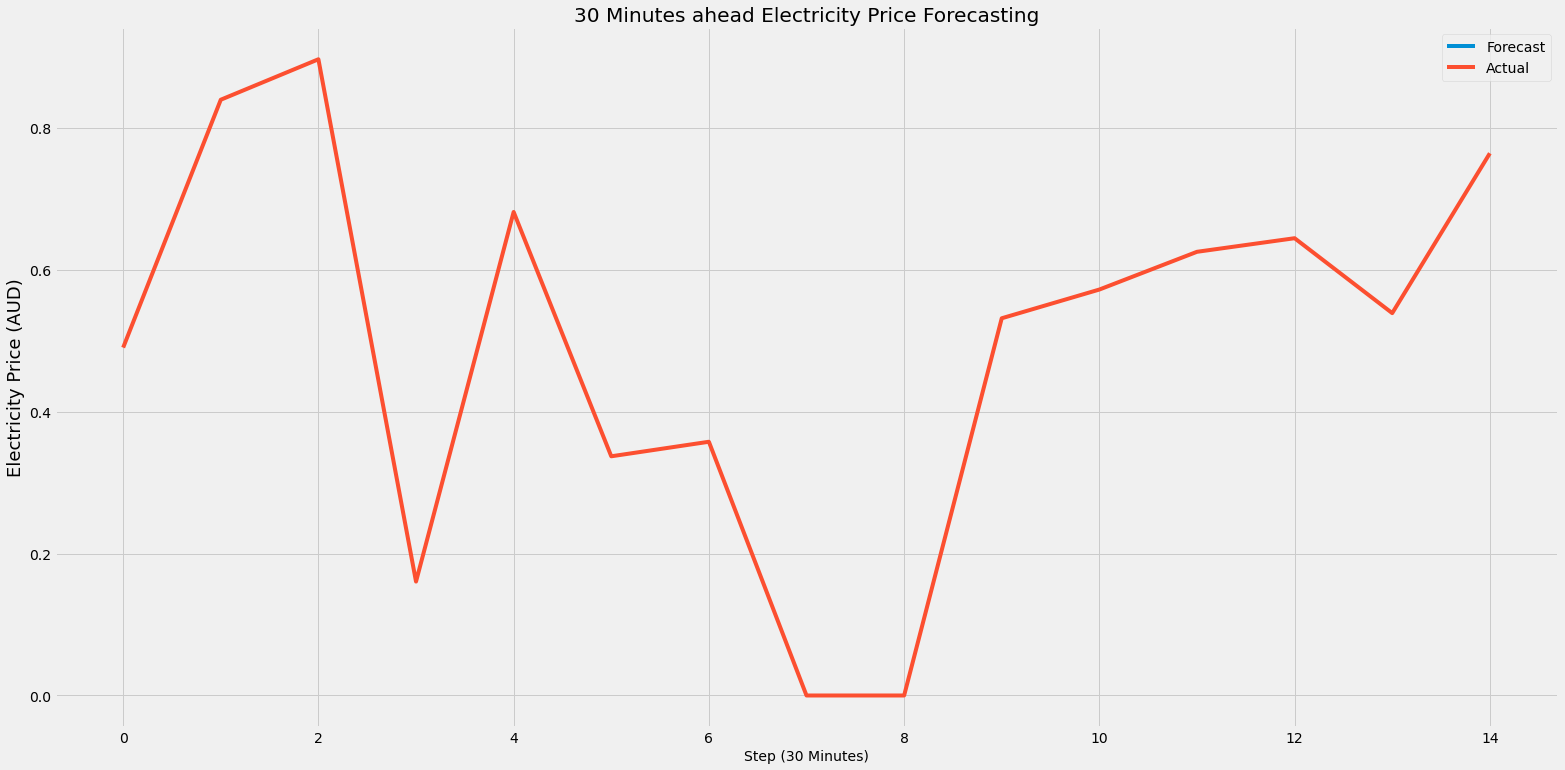

In [263]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 Minutes)', fontsize=14)
plt.ylabel('Electricity Price (AUD)', fontsize=18)
plt.plot(predictions[315:415])
plt.plot(scaler.inverse_transform(y_test)[100:200])
plt.legend(['Forecast', 'Actual'])
plt.show()

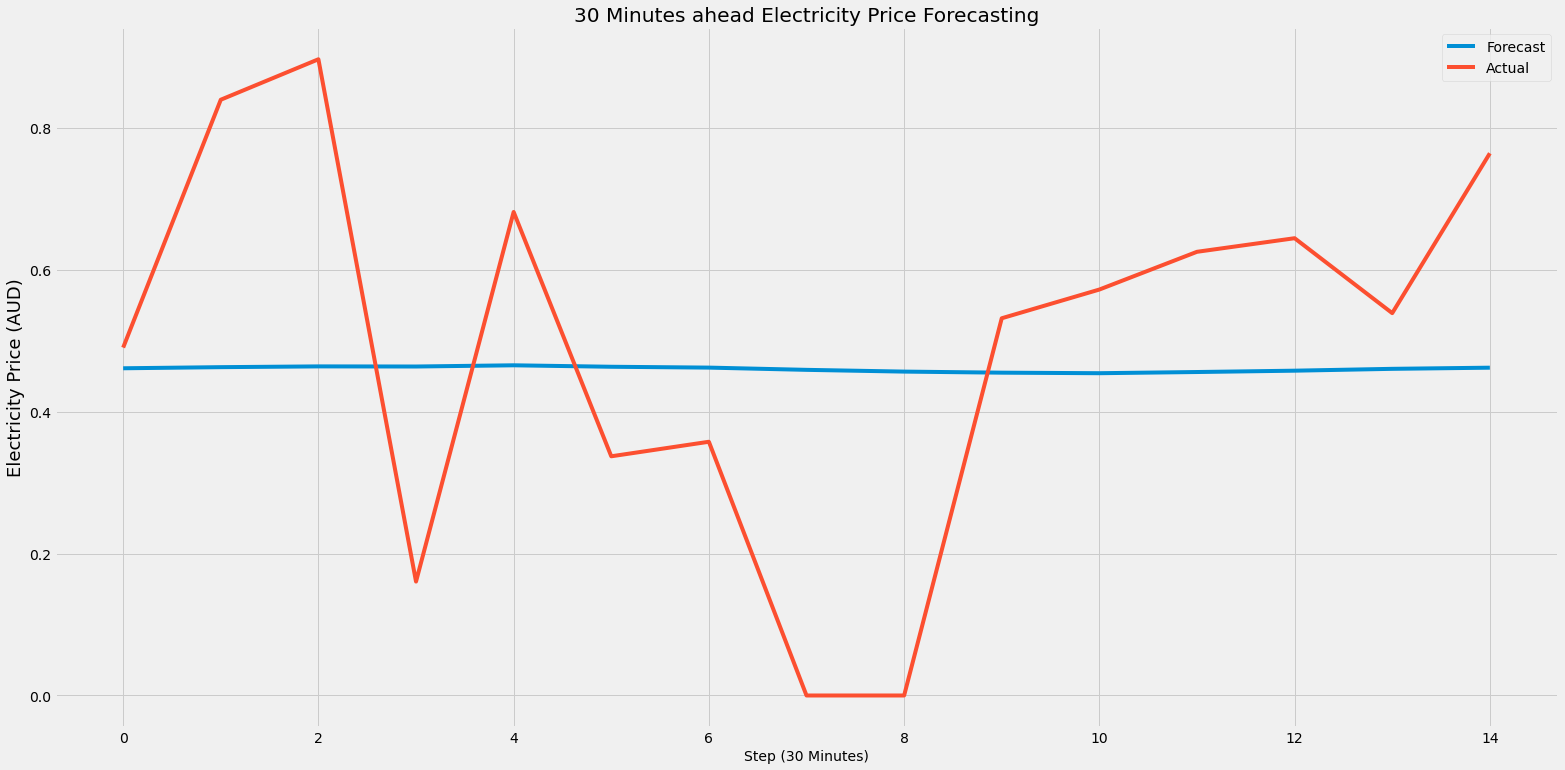

In [262]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 Minutes)', fontsize=14)
plt.ylabel('Electricity Price (AUD)', fontsize=18)
plt.plot(predictions[100:200])
plt.plot(scaler.inverse_transform(y_test)[100:200])
plt.legend(['Forecast', 'Actual'])
plt.show()
